In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

x_train.shape
x_test.shape

(10000, 28, 28, 1)

In [5]:
x_train = np.pad(x_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
x_test = np.pad(x_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

In [6]:
img_w = x_train[0].shape[0]
img_h = x_test[0].shape[1]
num_channels = 1
seed = 98

np.random.seed(seed)
tf.random.set_seed(seed)

In [7]:
x_train = x_train/255
x_test = x_test/255

In [8]:
batch_size = 100
eval_size = 500

epochs = 300
eval_every = 5

In [9]:
input_data = tf.keras.Input(dtype=tf.float32, shape=(img_w, img_h, num_channels), name='Input')


In [10]:
#conv-relu-pooling

conv1 = tf.keras.layers.Conv2D(filters = 6,
                       kernel_size= 5,
                       padding = 'VALID',
                       activation = "relu",
                       name = "c1"
                      )(input_data)

max_pool1 = tf.keras.layers.MaxPool2D(pool_size=2,
                                     strides = 2,
                                     padding = "SAME",
                                     name = "s1")(conv1)

conv2 = tf.keras.layers.Conv2D(filters = 16,
                       kernel_size= 5,
                       padding = 'VALID',
                       strides = 1,        
                       activation = "relu",
                       name = "c3"
                      )(max_pool1)

max_pool2 = tf.keras.layers.MaxPool2D(pool_size=2,
                                     strides = 2,
                                     padding = "SAME",
                                     name = "s4")(conv2)

flatten = tf.keras.layers.Flatten(name="FLATTEN")(max_pool2)

fc1 = tf.keras.layers.Dense(units = 120,
                           activation = "relu",
                           name = "f5")(flatten)

fc2 = tf.keras.layers.Dense(units = 84,
                           activation = "relu",
                           name="f6")(fc1)

final_layer = tf.keras.layers.Dense(units = 10,
                                   activation = "softmax",
                                   name = "output")(fc2)

model = tf.keras.Model(inputs = input_data, outputs = final_layer)

In [11]:
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 32, 32, 1)]       0         
_________________________________________________________________
c1 (Conv2D)                  (None, 28, 28, 6)         156       
_________________________________________________________________
s1 (MaxPooling2D)            (None, 14, 14, 6)         0         
_________________________________________________________________
c3 (Conv2D)                  (None, 10, 10, 16)        2416      
_________________________________________________________________
s4 (MaxPooling2D)            (None, 5, 5, 16)          0         
_________________________________________________________________
FLATTEN (Flatten)            (None, 400)               0         
_________________________________________________________________
f5 (Dense)                   (None, 120)               48120 

In [12]:
train_loss = []
train_acc = []
test_acc = []

for i in range(epochs):
    rand_idx = np.random.choice(len(x_train), size=batch_size)
    rand_x = x_train[rand_idx]
    rand_y = y_train[rand_idx]
    
    history_train = model.train_on_batch(rand_x, rand_y)
    
    if((i+1)%eval_every == 0):
        eval_index = np.random.choice(len(x_test), size=eval_size)
        eval_x = x_test[eval_index]
        eval_y = y_test[eval_index]
        
        history_eval = model.evaluate(eval_x, eval_y)
        
        train_loss.append(history_train[0])
        train_acc.append(history_train[1])
        
        test_acc.append(history_eval[1])
        
        acc_and_loss = [(i+1), history_train[0], history_train[1], history_eval[1]]
        acc_and_loss = [np.round(x,2) for x in acc_and_loss]
        print('Epoch # {}. Train Loss: {:.2f}. Train Acc (Test Acc): {:.2f} ({:.2f})'.format(*acc_and_loss))

16/16 [==============================] - 0s 3ms/step - loss: 2.1737 - accuracy: 0.3440
Epoch # 5. Train Loss: 2.19. Train Acc (Test Acc): 0.23 (0.34)
16/16 [==============================] - 0s 2ms/step - loss: 1.9759 - accuracy: 0.5800
Epoch # 10. Train Loss: 2.01. Train Acc (Test Acc): 0.60 (0.58)
16/16 [==============================] - 0s 2ms/step - loss: 1.6057 - accuracy: 0.7300
Epoch # 15. Train Loss: 1.71. Train Acc (Test Acc): 0.74 (0.73)
16/16 [==============================] - 0s 2ms/step - loss: 1.2110 - accuracy: 0.7740
Epoch # 20. Train Loss: 1.32. Train Acc (Test Acc): 0.73 (0.77)
16/16 [==============================] - 0s 4ms/step - loss: 0.8708 - accuracy: 0.7980
Epoch # 25. Train Loss: 0.93. Train Acc (Test Acc): 0.76 (0.80)
16/16 [==============================] - 0s 3ms/step - loss: 0.6734 - accuracy: 0.7880
Epoch # 30. Train Loss: 0.82. Train Acc (Test Acc): 0.76 (0.79)
16/16 [==============================] - 0s 2ms/step - loss: 0.5094 - accuracy: 0.8480
Epoch # 

range(0, 300, 5)


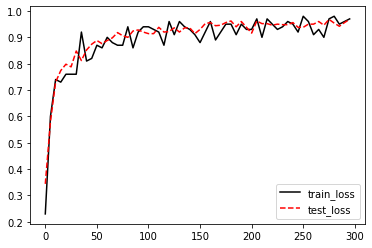

In [13]:
eval_indices = range(0, epochs, eval_every)
print(eval_indices)
plt.plot(eval_indices, train_acc, 'k-', label='train_loss')
plt.plot(eval_indices, test_acc, 'r--', label='test_loss')
plt.legend()
plt.show()

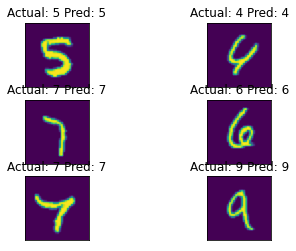

In [14]:
y = y_test[120:126]
y_pred= model.predict(x_test[120:126])

predictions = np.argmax(y_pred, axis=1)

images = np.squeeze(x_test[120:126])

rows = 3
cols = 2

for i in range(6):
    plt.subplot(rows, cols, i+1)
    plt.imshow(np.reshape(images[i], [32,32]))
    plt.title('Actual: '+str(y[i])+' Pred: '+str(predictions[i]))
    
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()